# <p style="text-align: center;">Mapeamento de dados para escolha das escolas a serem beneficiadas</p>

### Valor do Investimento
Para as três séries do ensino médio, com 30 alunos em cada série, com apenas uma turma para cada série em cada uma das 100 escolas, tem-se o total de 9000 alunos a serem beneficiados pelo programa. Deste modo, o valor total a ser investido, em Reais, é:

+ #### Valor com preço do dólar em janeiro de 2019 (R\$ 3,657)

> R\$ 329.130,00/mês


+ #### Valor com preço do dólar em dezembro de 2020 (R\$ 5,196)

> R\$ 467.640,00/mês





### Arquivos Utilizados

>##### MICRODADOS_ENEM_2020.csv
>> Foi utilizado para acessar os dados do ENEM 2020, onde fez-se o uso das notas em todas as provas, colégios em que as provas foram realizadas e número de identificação dos candidatos, para cálculo do número de participantes.
>> Esse arquivo foi obtido neste [link](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem  "Site com dados do ENEM").

>##### IDHM_dataset.xlsx
>> Foi utilizado para verificar os índices de desenvolvimento dos municípios e estados brasileiros.
>> Esse arquivo foi obtido em forma de tabela, através do excel, a partir deste [link](https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-municipios-2010.html  "IDHM Municípios 2010").

>##### microdados_ed_basica_2021.csv
>> Esse arquivo foi utilizado para criar tabelas com os nomes das escolas elegíveis para o programa.
>> O arquivo foi obtido em formato csv, baixado a partir deste [link](https://inepdata.inep.gov.br/analytics/saw.dll?Dashboard&PortalPath=%2Fshared%2FCenso%20da%20Educa%C3%A7%C3%A3o%20B%C3%A1sica%2F_portal%2FCat%C3%A1logo%20de%20Escolas&Page=Lista%20das%20Escolas&P1=dashboard&Action=Navigate&ViewState=g1n321br5g6kta3gaikqh360m2&P16=NavRuleDefault&NavFromViewID=d%3Adashboard~p%3Asf156n9k0qs70741  "IDHM Municípios 2010"), com filtros configurados para mostrar todas as ocorrências.




### Tratamentos Aplicados nas Bases de Dados

>##### MICRODADOS_ENEM_2020.csv
>
>> Particionamento do dataset (criação de alguns datasets com poucas colunas).
>
>> Remoção de linhas com valores faltantes (prováveis abstenções).
>


>##### IDHM_dataset.xlsx
>
>> Alteração do tipo dos dados nas colunas com números (object para float64).
>
>> Alteração do separador decimal (',' para '.').
>
>> Remoção de erros, para homogeneidade dos dados. Todos foram transformados em número do tipo '0.123' (exs: '0.745td>' se tornou '0.745'; '0.45' se tornou '0.450'.


>##### microdados_ed_basica_2021.csv
>
>> Particionamento com aplicação de filtros (seleção de colunas e linhas desejadas).


### Dados Faltantes

>#### IDHM_dataset.xlsx `0%`

>#### microdados_ed_basica_2021.csv `0%`

>#### MICRODADOS_ENEM_2020.csv* `55.09%` 


*Para os dados utilizados, ou seja, apenas as colunas com as notas e id dos candidatos.



### Visão Geral das Bases de Dados




In [57]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
data_IDHM = pd.read_excel(r'datasets/IDHM_dataset.xlsx')
#data_ENEM = pd.read_csv('datasets/MICRODADOS_ENEM_2020.csv', sep=";", encoding="latin-1", nrows=10)
#data_escolas = pd.read_csv('datasets/microdados_ed_basica_2021.csv', sep=";", encoding="latin-1", nrows=10)

#### Número de inscritos no Enem 2020

`5.783.109 pessoas tiveram inscrições efetivadas para o ENEM 2020.*`

*O valor varia um pouco dos dados oficiais divulgados.


#### Notas médias das provas do ENEM 2020

Existe uma pequena diferença dos dados oficias, pois foram excluídos simultaneamente os valores faltantes e zeros.
 


In [21]:
notas_ENEM = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
df_notas = pd.read_csv('datasets/MICRODADOS_ENEM_2020.csv', sep=";", encoding="ISO-8859-1", usecols=notas_ENEM)
df_notas.dropna(axis=0, subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'], inplace=True)

In [28]:
nota_CN = df_notas['NU_NOTA_CN'].mean()
nota_CH = df_notas['NU_NOTA_CH'].mean()
nota_LC = df_notas['NU_NOTA_LC'].mean()
nota_MT = df_notas['NU_NOTA_MT'].mean()
nota_REDACAO = df_notas['NU_NOTA_REDACAO'].mean()
media_total = round((nota_CN + nota_CH + nota_LC + nota_MT + nota_REDACAO)/5, 2)

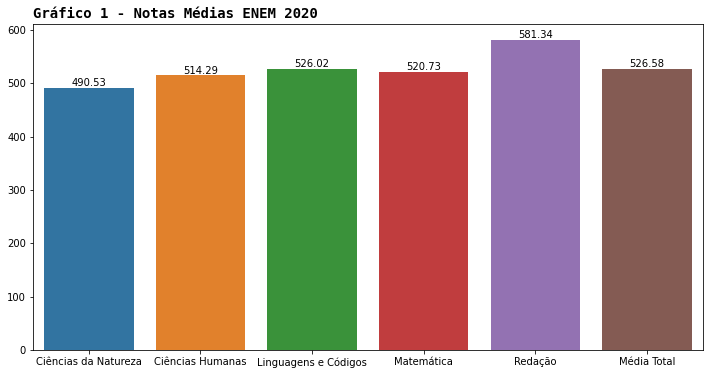

In [50]:
data_notas = {'Prova':  ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Média Total'],
        'Nota': [nota_CN, nota_CH, nota_LC, nota_MT, nota_REDACAO, media_total]
        }

df = pd.DataFrame(data_notas)
df = df.round(2)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='Prova', y='Nota', errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Gráfico 1 - Notas Médias ENEM 2020', size=14, loc='left', family='monospace', weight=800)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Escolas a Serem Escolhidas

Os dados sobre a origem escolar dos alunos não são confiáveis (missing muito alto). Portanto, foram utilizados dados do Catálogo de Escolas, disponibilizado no site Inep data, concomitantemente com os dados de IDHM.
Foi decidido que, para este programa, serão beneficiadas escolas estaduais e municipais, do estado do Maranhão, escolhido dentre os demais por ser o estado de menor IDHM Renda (Gráfico 2). O número de escolas escolhidas, totalizando 100 escolas, foi o seguinte:
* 10 Escolas Estaduais Rurais
* 10 Escolas Municipais Rurais
* 40 Escolas Estaduais Urbanas
* 40 Escolas Municipais Urbanas



In [ ]:
data_IDHM['IDHM'] = data_IDHM['IDHM'].str.replace(',','.')
data_IDHM['IDHM_Renda'] = data_IDHM['IDHM_Renda'].str.replace(',','.')
data_IDHM['IDHM_Longevidade'] = data_IDHM['IDHM_Longevidade'].str.replace(',','.')
data_IDHM['IDHM_Educacao'] = data_IDHM['IDHM_Educacao'].str.replace(',','.')

In [ ]:
data_IDHM['IDHM_Renda'] = data_IDHM['IDHM_Renda'].str[:5]
data_IDHM['IDHM_Longevidade'] = data_IDHM['IDHM_Longevidade'].str[:5]
data_IDHM['IDHM_Educacao'] = data_IDHM['IDHM_Educacao'].str[:5]

In [ ]:
data_IDHM['IDHM'] = data_IDHM['IDHM'].astype(float)
data_IDHM['IDHM_Renda'] = data_IDHM['IDHM_Renda'].astype(float)
data_IDHM['IDHM_Longevidade'] = data_IDHM['IDHM_Longevidade'].astype(float)
data_IDHM['IDHM_Educacao'] = data_IDHM['IDHM_Educacao'].astype(float)

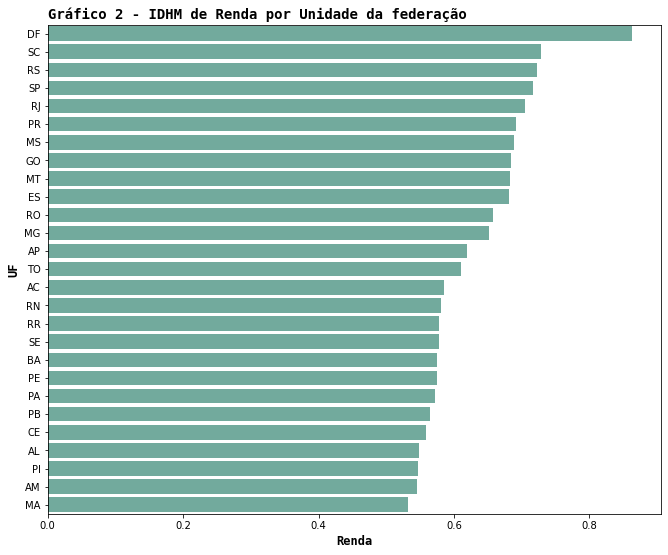

In [64]:
data_IDHM['UF'] = data_IDHM['Municipio'].str.extract(r"\((.*?)\)", expand=False)

renda_by_UF = data_IDHM[['IDHM_Renda', 'UF']].groupby('UF').mean().sort_values('IDHM_Renda', ascending=False).reset_index()
renda_by_UF_frame = pd.DataFrame(renda_by_UF)
renda_by_UF_frame = renda_by_UF_frame.sort_values(['IDHM_Renda'], ascending=False).reset_index(drop=True)

plt.figure(figsize=(11, 9))

ax = sns.barplot(
        x="IDHM_Renda", 
        y="UF", 
        data=renda_by_UF_frame, 
        ci=None, 
        color='#69b3a2')

plt.xlabel('Renda', size=12, family='monospace', weight=800)
plt.ylabel('UF', size=12, family='monospace', weight=800)
plt.title('Gráfico 2 - IDHM de Renda por Unidade da federação', loc='left', size=14, family='monospace', weight=1000)

plt.show()

As escolas das cidades que atendem aos critérios (IDHM < 0,599), deverão ser escolhidas, apenas, dentre as escolas presentes nas tabelas:

* [Escolas Estaduais Rurais](https://docs.google.com/spreadsheets/d/1wkHESOZemxqBk_cICKitwZqHQl3hlOyx/edit?usp=sharing&ouid=102199336098684708940&rtpof=true&sd=true) 
* [Escolas Municipais Rurais](https://docs.google.com/spreadsheets/d/16Y7z1T09KTIF7CyY7Qy6zHycXtXi-Qxz/edit?usp=sharing&ouid=102199336098684708940&rtpof=true&sd=true)
* [Escolas Estaduais Urbanas](https://docs.google.com/spreadsheets/d/1wr9U6sTvK0f6__c-bT8X1lGpF9YSymku/edit?usp=sharing&ouid=102199336098684708940&rtpof=true&sd=true)
* [Escolas Municipais Urbanas](https://docs.google.com/spreadsheets/d/19cU_e7Sxcs96KzbMaJgHOZOJ540kgofR/edit?usp=sharing&ouid=102199336098684708940&rtpof=true&sd=true)

### Conclusão

>Com o método adotado, alunos carentes, que moram em lugares com baixos índices econômicos e educacionais, serão beneficiados. O método concentra-se em uma região, podendo ser trabalhada uma região por ano, ou ser alterado para abranger todo o território nacional a cada período anual.
>
>Como sugestão, indica-se adotar métodos filantrópicos de participação direta, ou seja, investir diretamente em programas de educação dos alunos, com oferta de cursos, oficinas, mentoriais e etc, de modo a não ser necessário o repasse para as escolas, para que haja uma independência do método de ensino.